<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img width="100%" src="https://img.freepik.com/free-photo/beautiful-view-peace-bridge-river-captured-calgary-canada_181624-17667.jpg"></center>

<a href='https://www.freepik.com/vectors/city'>City vector created by freepik - www.freepik.com</a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já se tornou a solução ideal para quem prefere se hospedar em uma casa ou apartamento. Para muitas pessoas, viajar para outros lugares é uma prioridade e porque não aliar isso a uma hospedagem diferente do padrão como hotéis convencionais?

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Com apenas quatro anos de existência, o Airbnb se tornou uma das principais plataformas de hospedagens do mundo. Hoje o serviço está presente em mais de 30 mil cidades e 192 países, oferecendo opções mais convencionais até as mais inusitadas, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos, respondendo as seguintes questões**
* Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
* Qual a porcentagem de valores ausentes no dataset?
* Qual o tipo de distribuição das variáveis?
* Qual a média dos preços de aluguel?
* Qual a correlação existente entre as variáveis?
* Qual o tipo de imóvel mais alugado no Airbnb?
* Qual a localidade mais cara de Toronto?
* Qual é a média do mínimo de noites para aluguel (minimum_nights)?


## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Toronto (good for visualisations).

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Legenda das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com 18265 entradas e 74 variáveis (listings.csv.gz).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 18265
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
As variáveis reviews_per_month e last_review possuem valores nulos em quase um quarto das linhas.
As variáveis name e host_name não possuem quase nenhum valor nulo.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.224747
last_review                       0.224747
host_name                         0.000602
name                              0.000055
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, vamos plotar o histograma.

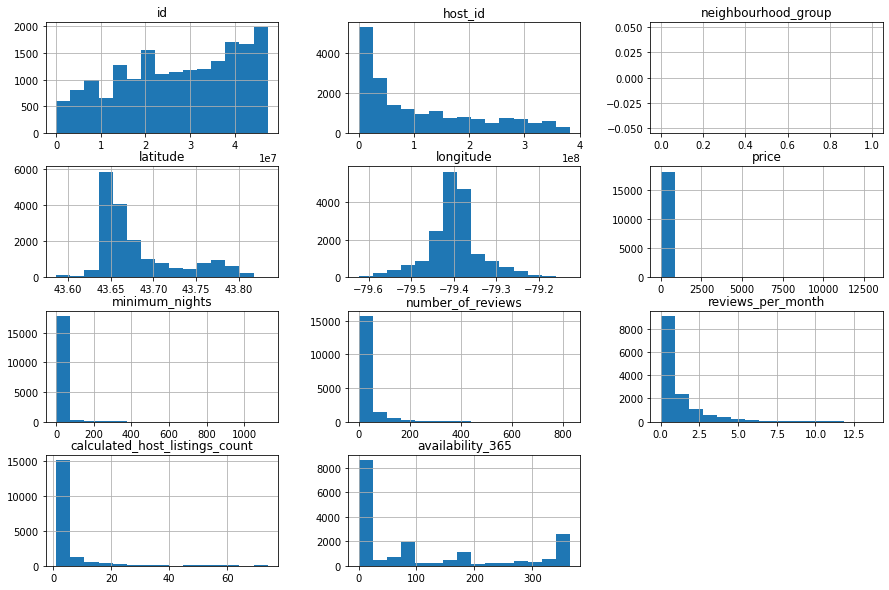

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [11]:
# ver a média da coluna `price``
print("O preço médio de aluguel em Toronto é de: C$", round(df.price.mean(),2))

O preço médio de aluguel em Toronto é de: C$ 137.66


### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025687,-0.020122,-0.016837,-0.015814,0.014682
minimum_nights,0.025687,1.000000,-0.012680,-0.038699,-0.005083,0.137730
number_of_reviews,-0.020122,-0.012680,1.000000,0.789910,-0.047195,0.059603
reviews_per_month,-0.016837,-0.038699,0.789910,1.000000,-0.015004,0.058637
calculated_host_listings_count,-0.015814,-0.005083,-0.047195,-0.015004,1.000000,0.151160
availability_365,0.014682,0.137730,0.059603,0.058637,0.151160,1.000000


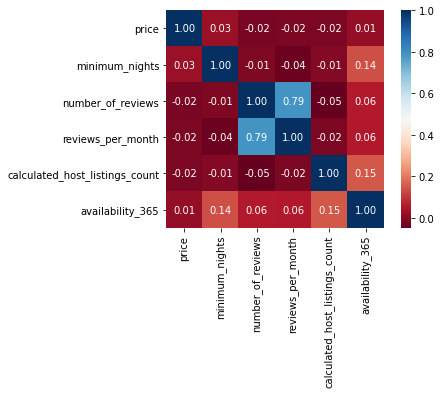

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11550
Private room        6349
Shared room          308
Hotel room            58
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.632357
Private room       0.347605
Shared room        0.016863
Hotel room         0.003175
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Toronto?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Rustic                               332.285714
Woburn                               299.888889
Yonge-St.Clair                       224.696970
Forest Hill South                    205.314286
Waterfront Communities-The Island    195.546729
Leaside-Bennington                   191.020833
Bathurst Manor                       190.609756
Maple Leaf                           190.333333
Kingsway South                       188.384615
Niagara                              187.755263
Name: price, dtype: float64

Acima, vemos que bairros como Rustic, woburn e yonge-st.clair, estão com média de preço superior a de lugares como Niagara, Kingsway south e Maple Leaf.


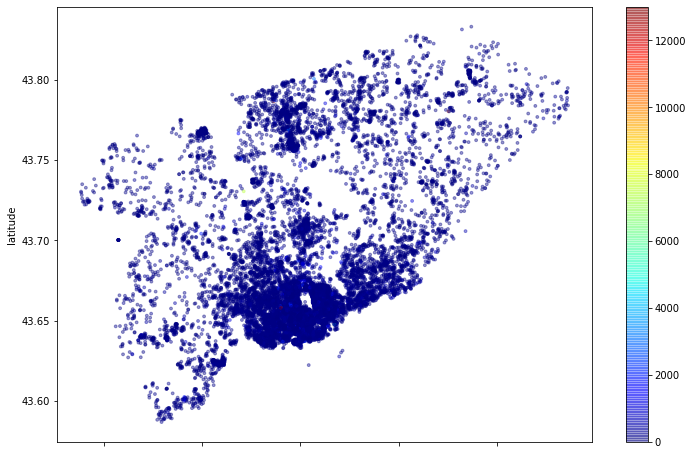

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [12]:
# ver a média da coluna `minimum_nights``
print("A média do mínimo de noites para se hospedar em Toronto é de:", round(df.minimum_nights.mean()))

A média do mínimo de noites para se hospedar em Toronto é de: 13


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.